In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter


In [3]:

def plot_boxplots(ax, data, plot_title, number_plots, plots_ticks, yticks, ylim):
    # Set fonts (safe for Colab)
    plt.rcParams.update({
        "text.usetex": False,
        "font.family": "serif",
        "mathtext.fontset": "cm",
    })

    # Create boxplot on the given axes
    box = ax.boxplot(data, notch=True, patch_artist=True, widths=0.4)

    for patch in box['boxes']:
        patch.set(facecolor='lightgray')

    # Scientific formatting
    # formatter = ScalarFormatter(useMathText=True)
    # # formatter.set_scientific(True)
    # # formatter.set_powerlimits((3, 3)) # Forzamos la potencia a ser 3
    # ax.yaxis.set_major_formatter(formatter)
    # ax.yaxis.offsetText.set_fontsize(26)
    # ax.yaxis.offsetText.set_text('$\\times 10^3$') # Establecemos el texto directamente


    ax.set_xticks(np.arange(1, number_plots + 1))
    ax.set_xticklabels(plots_ticks, fontsize=20, rotation=90)
    ax.set_yticks(yticks)
    ax.set_ylim(ylim)

    # ax.set_xlabel("Instances of control software", fontsize=22, labelpad=20, fontweight='bold')

    ax.tick_params(axis='y', labelsize=30)

    
    



In [4]:
def plot_single_boxplot(data, plot_title, number_plots, plots_ticks, yticks, ylim):
    # Font setup
    plt.rcParams.update({
        "text.usetex": False,
        "font.family": "serif",
        "mathtext.fontset": "cm",
    })

    # Create single figure
    plt.figure(figsize=(8, 7))

    # Boxplot
    box = plt.boxplot(data, notch=True, patch_artist=True, widths=0.4)

    # Color fill
    for patch in box['boxes']:
        patch.set(facecolor='lightgray')

    # Axis configuration
    plt.xticks(np.arange(1, number_plots + 1), plots_ticks, fontsize=20, rotation=0)
    plt.yticks(yticks, fontsize=20)
    plt.ylim(ylim)

    # Labels and title
    plt.title(plot_title, fontsize=28, pad=20, fontweight='bold')
    plt.ylabel("Scores (10 runs)", fontsize=22, labelpad=20, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [5]:
# Read and evaluate the file
with open('total_score_tutti.txt', 'r') as file:
    content = file.read()

# Evaluate the dictionary using eval (safe only if you trust the file source)
score_dict = eval(content, {"__builtins__": None}, {"array": np.array})
score_dict.keys()

dict_keys(['Tutti-1g1s', 'Tutti-1g2s', 'Tutti-1g3s', 'Tutti-1g4s', 'Tutti-1g5s', 'Tutti-1g6s'])

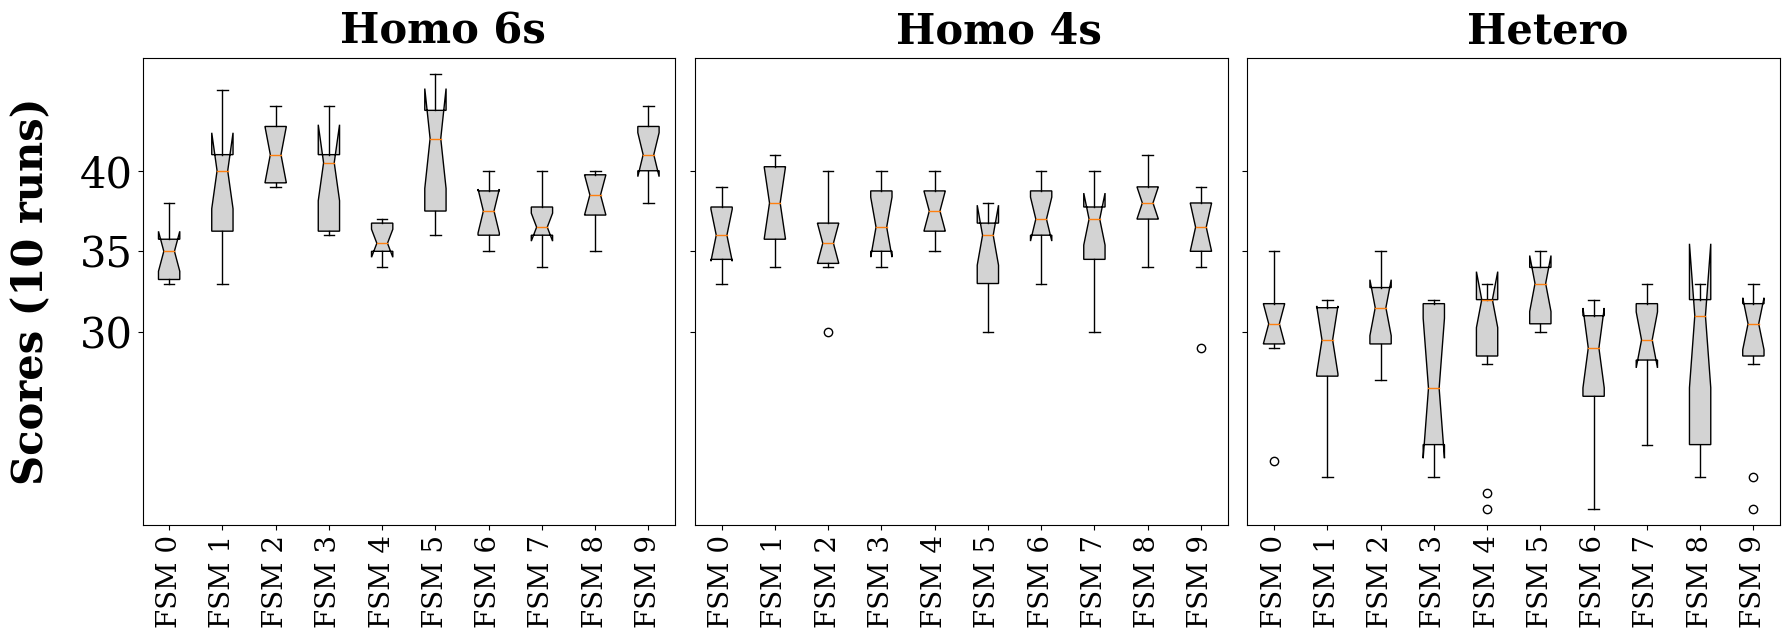

In [101]:
# === Prepare data ===
mission1 = 'cho-6s'
mission2 = 'cho-hom'
mission3 = 'grappa-het'

data1 = [values for values in score_dict[mission1]]
data2 = [values for values in score_dict[mission2]]
data3 = [values for values in score_dict[mission3]]

ticks1 = ['FSM 0', 'FSM 1', 'FSM 2', 'FSM 3', 'FSM 4','FSM 5', 'FSM 6', 'FSM 7', 'FSM 8', 'FSM 9'] 
ticks2 = ['H2-I0-HB', 'H2-I1-HB', 'H2-I2-HB', 'H2-I3-HB', 'H2-I4-TT', 'H2-I5-HB', 'H2-I6-TT', 'H2-I7-HB', 'H2-I8-HB', 'H2-I9-HB']

# === Create subplots in 1 row, 2 columns ===
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Only show y-label for the first plot and x-label for the second plot
plot_boxplots(axes[0], data1, 'Homing 20%', len(data1), ticks1,  yticks=[30, 35, 40], ylim=[18, 47])
plot_boxplots(axes[1], data2, 'Homing 100%', len(data2), ticks1, yticks=[30, 35, 40], ylim=[18, 47])
plot_boxplots(axes[2], data3, 'Homing 20%', len(data1), ticks1, yticks=[30, 35, 40], ylim=[18, 47])

# Remove y-ticks from the second plot to avoid duplication
axes[1].set_yticklabels('')
axes[2].set_yticklabels('')

# Set the x-axis label in the middle of the figure
# fig.text(0.5, -0.05, "Instances of control software", ha='center', fontsize=32)

# Get bounding boxes of the axes
start_ax = axes[0]
end_ax   = axes[1]

# Get center x-coordinates of each column in figure coordinates
start_center = start_ax.get_position().x0 + start_ax.get_position().width / 2
end_center   = end_ax.get_position().x0 + end_ax.get_position().width / 2

# Add labels
# fig.text(-0.03, 0.6, 'HOMING', va='center', ha='center', rotation='vertical', fontsize=38, fontweight='bold')
fig.text(start_center+0.01, 1, 'Homo 6s', ha='center', fontsize=30, fontweight='bold')
fig.text(end_center+0.045, 1, 'Homo 4s', ha='center', fontsize=30, fontweight='bold')
fig.text(end_center+0.35, 1, 'Hetero', ha='center', fontsize=30, fontweight='bold')

# Set the y-axis label only for the first plot
axes[0].set_ylabel("Scores (10 runs)", fontsize=30, labelpad=20,fontweight='bold')

plt.tight_layout()
plt.savefig("hom_performance.pdf", format='pdf', bbox_inches='tight')
plt.show()


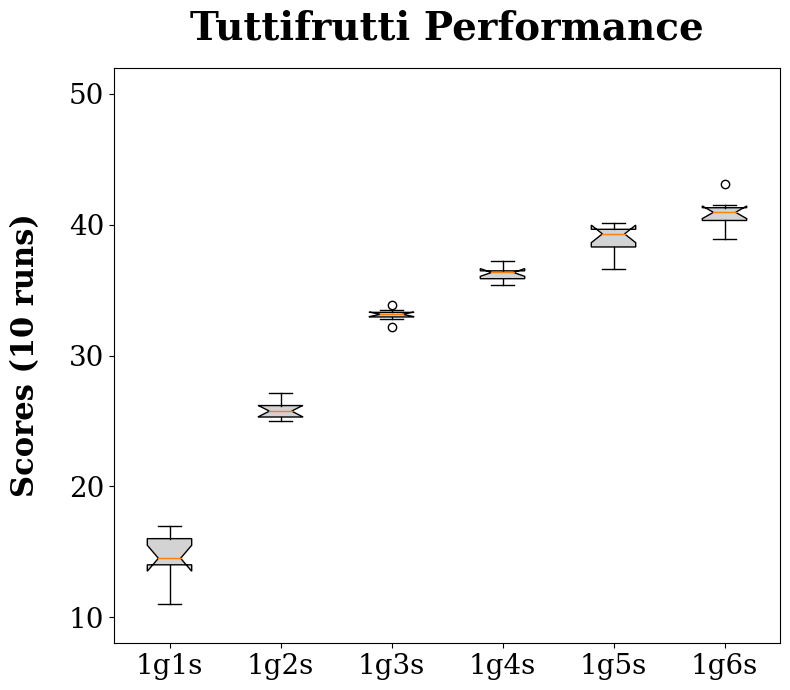

<Figure size 640x480 with 0 Axes>

In [17]:
# Read and evaluate the file
with open('total_score_tutti.txt', 'r') as file:
    content = file.read()

# Evaluate the dictionary using eval (safe only if you trust the file source)
score_dict = eval(content, {"__builtins__": None}, {"array": np.array})

# === Prepare data ===
mission1 = 'Tutti-1g1s'
mission2 = 'Tutti-1g2s'
mission3 = 'Tutti-1g3s'
mission4 = 'Tutti-1g4s'
mission5 = 'Tutti-1g5s'
mission6 = 'Tutti-1g6s'

data1 = np.stack(score_dict[mission1]).mean(axis=0)
data2 = np.stack(score_dict[mission2]).mean(axis=0)
data3 = np.stack(score_dict[mission3]).mean(axis=0)
data4 = np.stack(score_dict[mission4]).mean(axis=0)
data5 = np.stack(score_dict[mission5]).mean(axis=0)
data6 = np.stack(score_dict[mission6]).mean(axis=0)

ticks1 = ['1g1s', '1g2s', '1g3s', '1g4s', '1g5s', '1g6s'] 

# Each box represents the results of one mission
all_data = [data1, data2, data3, data4, data5, data6]

# === Plot single figure ===
plot_single_boxplot(
    data=all_data,
    plot_title="Tuttifrutti Performance",
    number_plots=len(all_data),
    plots_ticks=ticks1,
    yticks=[10, 20, 30, 40, 50],
    ylim=[8, 52]
)

# Optionally, save to file
plt.savefig("hom_performance.pdf", format='pdf', bbox_inches='tight')


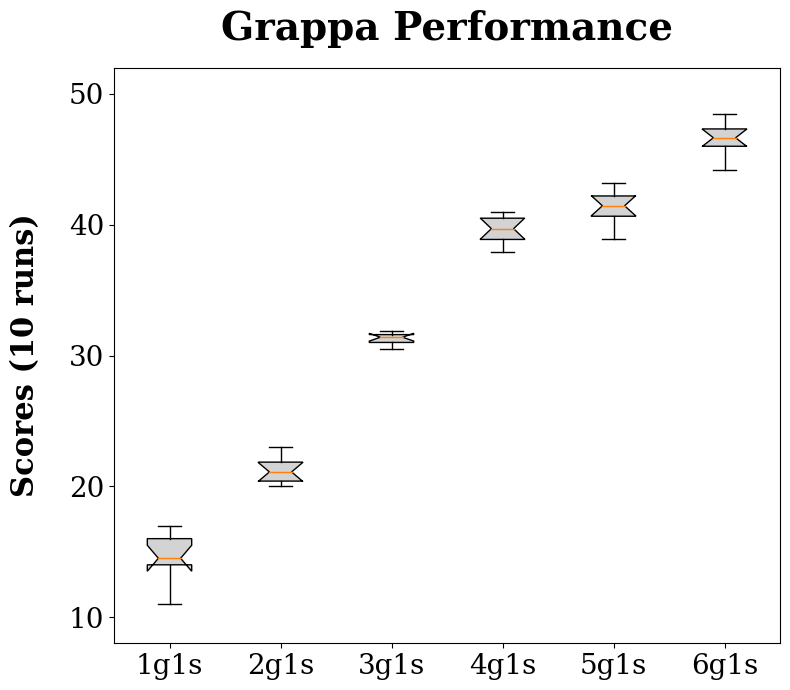

<Figure size 640x480 with 0 Axes>

In [18]:
# Read and evaluate the file
with open('total_score_grappa.txt', 'r') as file:
    content = file.read()

# Evaluate the dictionary using eval (safe only if you trust the file source)
score_dict = eval(content, {"__builtins__": None}, {"array": np.array})

# === Prepare data ===
mission1 = 'Grappa-1g1s'
mission2 = 'Grappa-2g1s'
mission3 = 'Grappa-3g1s'
mission4 = 'Grappa-4g1s'
mission5 = 'Grappa-5g1s'
mission6 = 'Grappa-6g1s'

data1 = np.stack(score_dict[mission1]).mean(axis=0)
data2 = np.stack(score_dict[mission2]).mean(axis=0)
data3 = np.stack(score_dict[mission3]).mean(axis=0)
data4 = np.stack(score_dict[mission4]).mean(axis=0)
data5 = np.stack(score_dict[mission5]).mean(axis=0)
data6 = np.stack(score_dict[mission6]).mean(axis=0)

ticks1 = ['1g1s', '2g1s', '3g1s', '4g1s', '5g1s', '6g1s'] 

# Each box represents the results of one mission
all_data = [data1, data2, data3, data4, data5, data6]

# === Plot single figure ===
plot_single_boxplot(
    data=all_data,
    plot_title="Grappa Performance",
    number_plots=len(all_data),
    plots_ticks=ticks1,
    yticks=[10, 20, 30, 40, 50],
    ylim=[8, 52]
)

# Optionally, save to file
plt.savefig("hom_performance.pdf", format='pdf', bbox_inches='tight')


In [71]:
data1

[array([38, 33, 35, 36, 33, 34, 35, 38, 35, 33]),
 array([37, 45, 41, 40, 41, 33, 36, 40, 44, 36]),
 array([39, 43, 44, 39, 44, 40, 42, 42, 39, 40]),
 array([40, 41, 41, 37, 44, 41, 42, 36, 36, 36]),
 array([36, 34, 37, 37, 35, 37, 35, 35, 35, 36]),
 array([37, 44, 36, 46, 37, 42, 39, 43, 45, 42]),
 array([35, 39, 35, 38, 36, 40, 38, 36, 37, 39]),
 array([36, 37, 38, 36, 39, 40, 37, 35, 34, 36]),
 array([38, 35, 39, 37, 40, 40, 37, 40, 39, 38]),
 array([40, 38, 42, 44, 41, 43, 38, 41, 40, 44])]

In [72]:
all_data

[array([37.6, 38.9, 38.8, 39. , 39. , 39. , 37.9, 38.6, 38.4, 38. ]),
 array([36.3, 36.1, 36.4, 37.4, 36.2, 36.8, 36.2, 36.7, 37.4, 35.8]),
 array([28.6, 29.7, 26.8, 28.9, 30. , 29.4, 29.7, 29.4, 30.9, 28.8])]

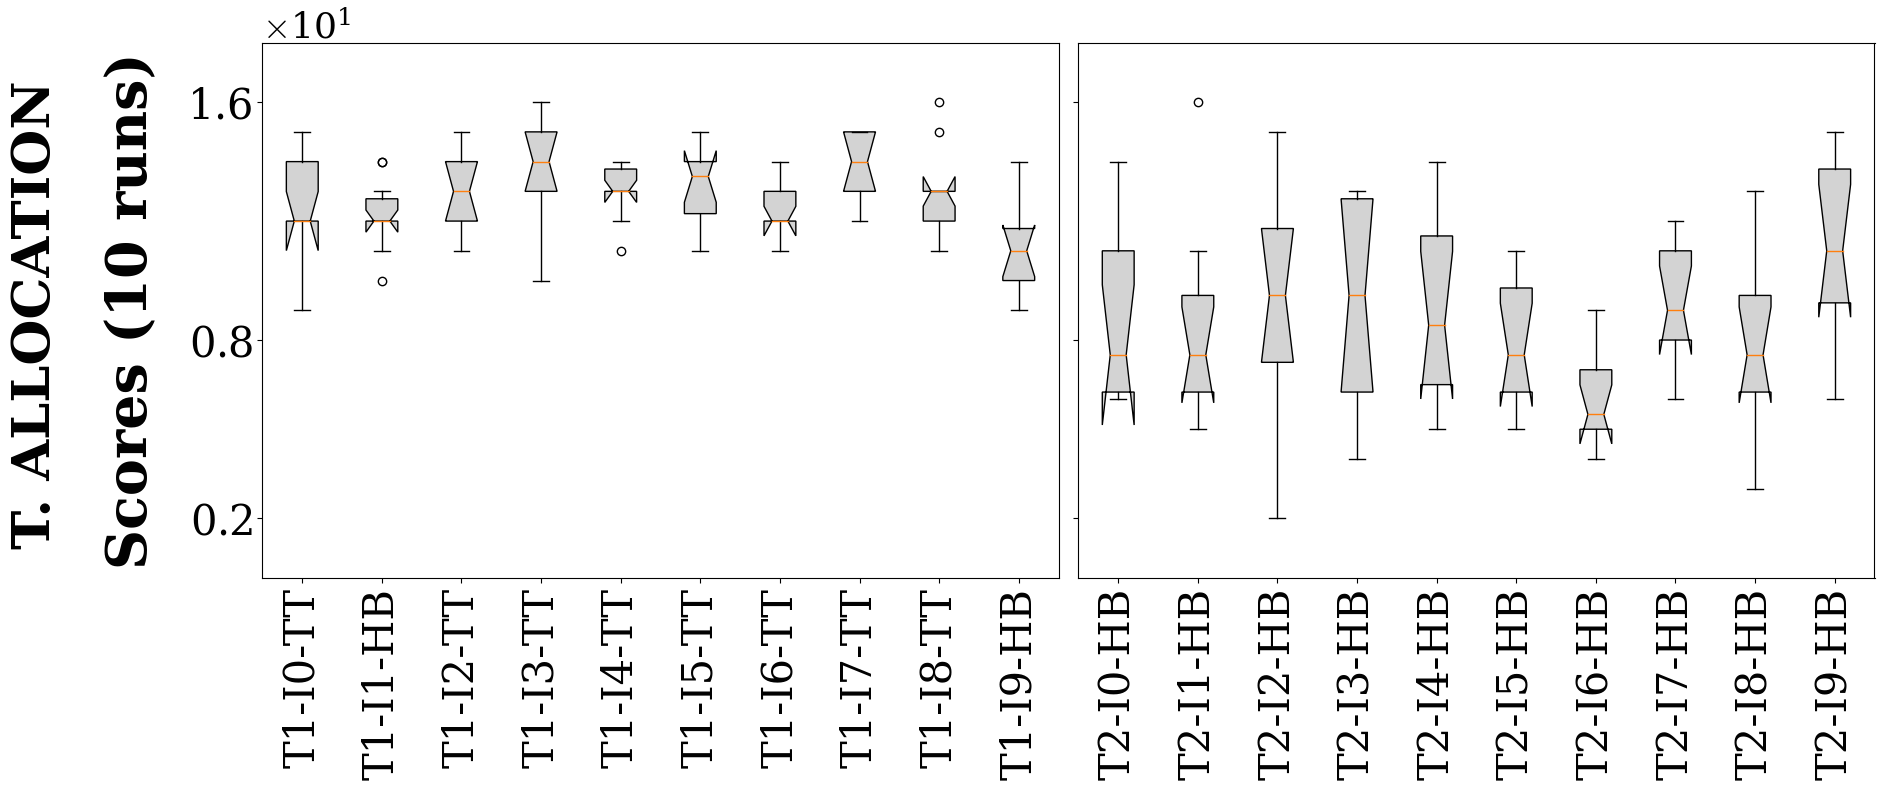

In [86]:
# === Prepare data ===
mission1 = 'init-ts-100'
mission2 = 'init-ts-020'

data1 = [-values for values in score_dict[mission1]]
data2 = [-values for values in score_dict[mission2]]

ticks1 = ['T1-I0-TT', 'T1-I1-HB', 'T1-I2-TT', 'T1-I3-TT', 'T1-I4-TT', 'T1-I5-TT', 'T1-I6-TT', 'T1-I7-TT', 'T1-I8-TT', 'T1-I9-HB']
ticks2 = ['T2-I0-HB', 'T2-I1-HB', 'T2-I2-HB', 'T2-I3-HB', 'T2-I4-HB', 'T2-I5-HB', 'T2-I6-HB', 'T2-I7-HB', 'T2-I8-HB', 'T2-I9-HB']

# === Create subplots in 1 row, 2 columns ===
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Only show y-label for the first plot and x-label for the second plot
plot_boxplots(axes[0], data1, 'Homing 20%', len(data1), ticks1, yticks=[2, 8, 16], ylim=[0, 18])
plot_boxplots(axes[1], data2, 'Homing 100%', len(data2), ticks2, yticks=[2, 8, 16], ylim=[0, 18])

# Remove y-ticks from the second plot to avoid duplication
axes[1].set_yticklabels([])

# Set the x-axis label in the middle of the figure
# fig.text(0.5, -0.05, "Instances of control software", ha='center', fontsize=32)

# Add labels
fig.text(-0.03, 0.6, 'T. ALLOCATION', va='center', ha='center', rotation='vertical', fontsize=38, fontweight='bold')
# fig.text(0.31, 1.02, 'Scenario 1', ha='center', fontsize=32)
# fig.text(0.76, 1.02, 'Scenario 2', ha='center', fontsize=32)

# Set the y-axis label only for the first plot
axes[0].set_ylabel("Scores (10 runs)", fontsize=40, labelpad=20, fontweight='bold')

plt.tight_layout()
plt.savefig("ALIFE_images/tsk_performance.pdf", format='pdf', bbox_inches='tight')
plt.show()


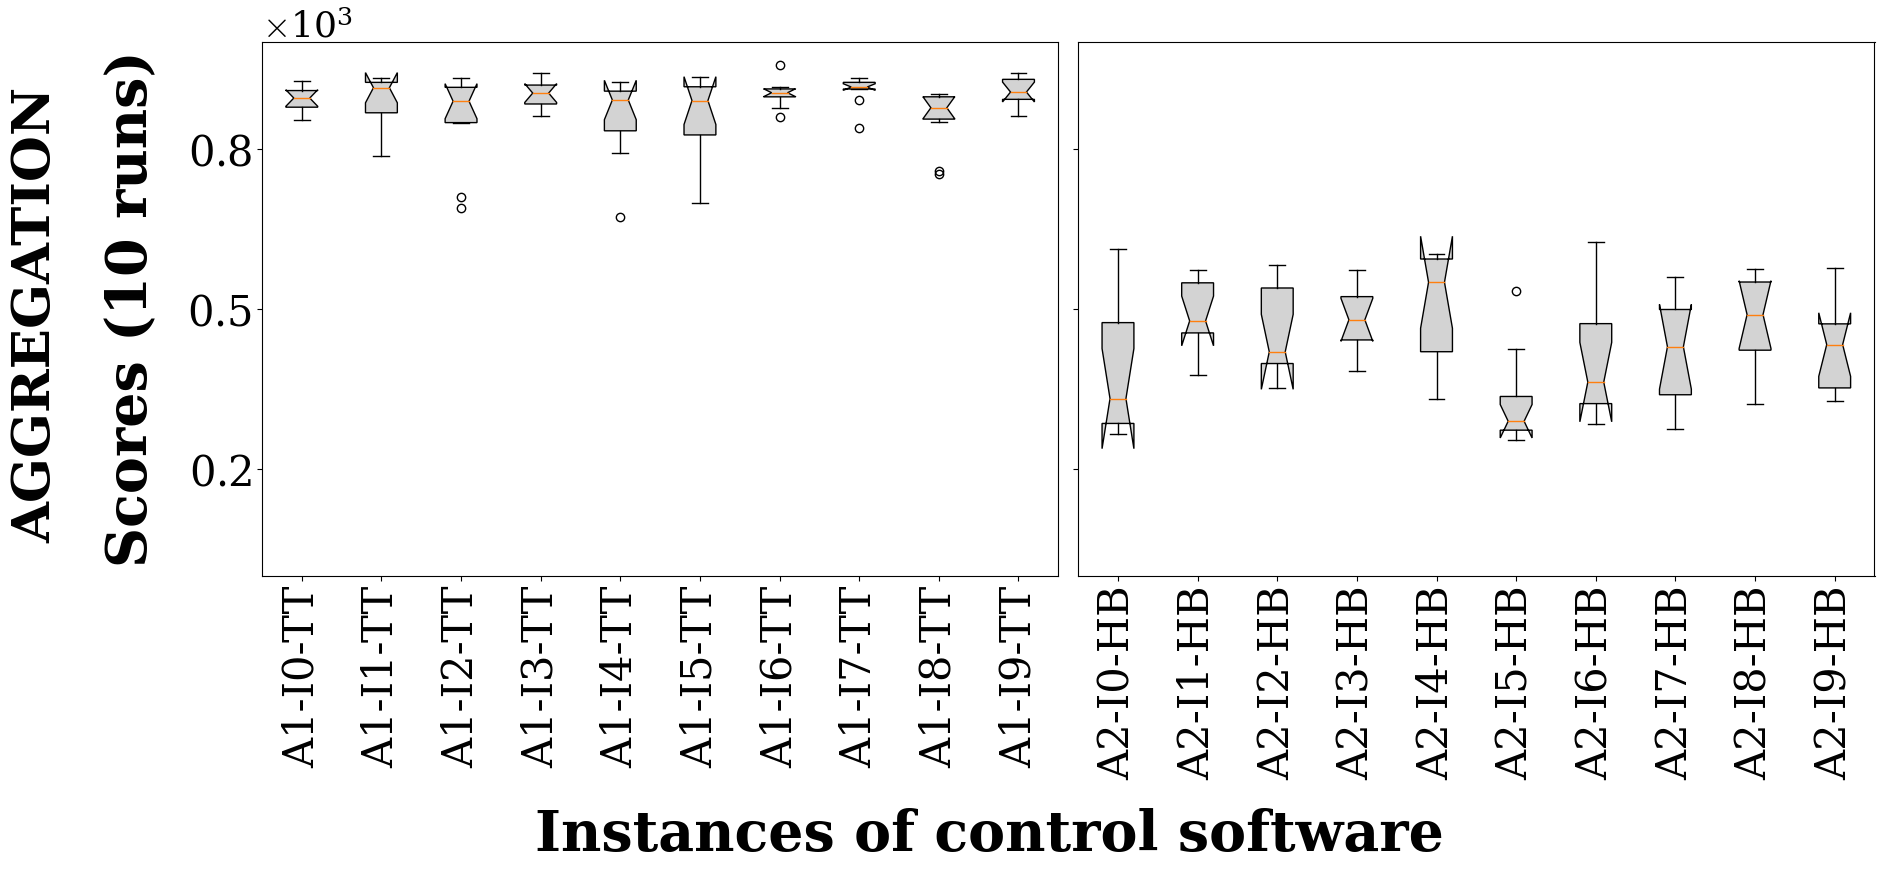

In [6]:
# === Prepare data ===
mission1 = 'init-agg-020'
mission2 = 'init-agg-100'

data1 = [values for values in score_dict[mission1]]
data2 = [values for values in score_dict[mission2]]

ticks1 = ['A1-I0-TT', 'A1-I1-TT', 'A1-I2-TT', 'A1-I3-TT', 'A1-I4-TT', 'A1-I5-TT', 'A1-I6-TT', 'A1-I7-TT', 'A1-I8-TT', 'A1-I9-TT']
ticks2 = ['A2-I0-HB', 'A2-I1-HB', 'A2-I2-HB', 'A2-I3-HB', 'A2-I4-HB', 'A2-I5-HB', 'A2-I6-HB', 'A2-I7-HB', 'A2-I8-HB', 'A2-I9-HB']

# === Create subplots in 1 row, 2 columns ===
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Only show y-label for the first plot and x-label for the second plot
plot_boxplots(axes[0], data1, 'Homing 20%', len(data1), ticks1, yticks=[200, 500, 800], ylim=[0, 1000])
plot_boxplots(axes[1], data2, 'Homing 100%', len(data2), ticks2, yticks=[200, 500, 800], ylim=[0, 1000])

# Remove y-ticks from the second plot to avoid duplication
axes[1].set_yticklabels([])

# Set the x-axis label in the middle of the figure
fig.text(0.5, -0.07, "Instances of control software", ha='center', fontsize=40, fontweight='bold')

# Add labels
fig.text(-0.03, 0.6, 'AGGREGATION', va='center', ha='center', rotation='vertical', fontsize=38, fontweight='bold')
# fig.text(0.31, 0.98, 'Scenario 1', ha='center', fontsize=32)
# fig.text(0.76, 0.98, 'Scenario 2', ha='center', fontsize=32)

# Set the y-axis label only for the first plot
axes[0].set_ylabel("Scores (10 runs)", fontsize=40, labelpad=20, fontweight='bold')

plt.tight_layout()
plt.savefig("ALIFE_images/agg_performance.pdf", format='pdf', bbox_inches='tight')
plt.show()


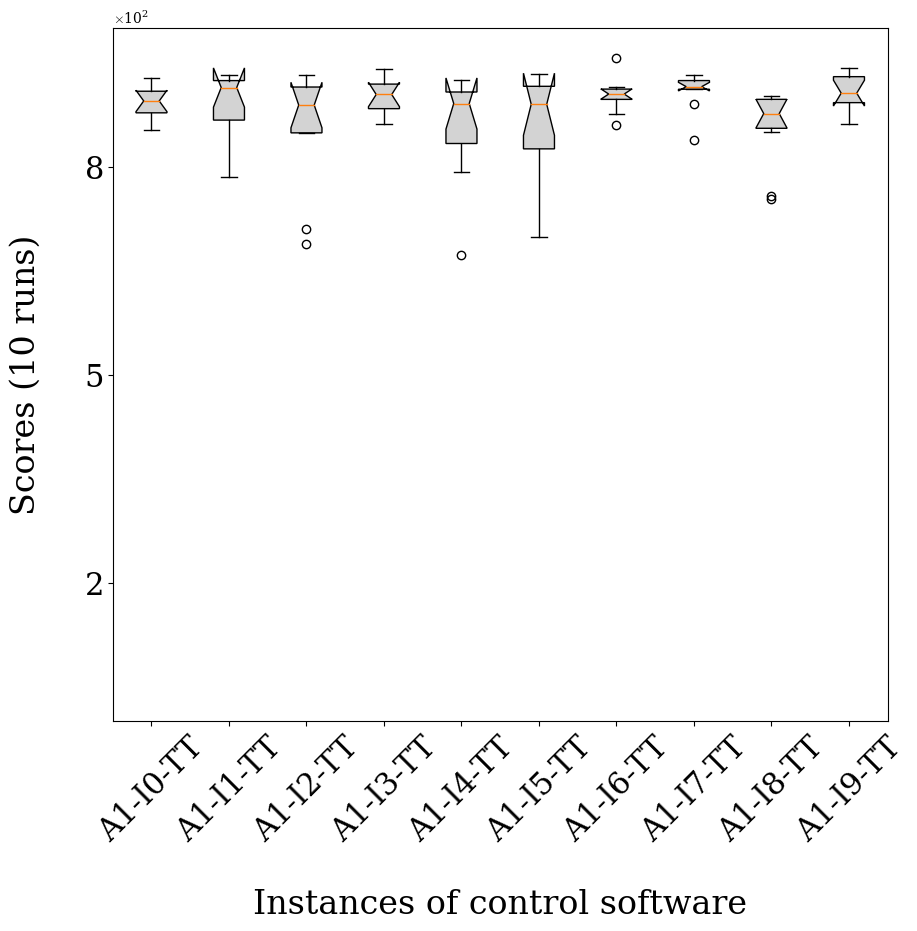

In [8]:
mission_name = 'init-agg-020'

plt.figure(figsize=(10, 9)) 

plot_boxplots([values for values in score_dict[mission_name]], 'Tasking 100%', number_plots=len(score_dict[mission_name]), 
              plots_ticks=['A1-I0-TT', 'A1-I1-TT', 'A1-I2-TT', 'A1-I3-TT', 'A1-I4-TT', 'A1-I5-TT', 'A1-I6-TT', 'A1-I7-TT', 'A1-I8-TT', 'A1-I9-TT'],
              yticks=[200, 500, 800], ylim=[0, 1000])

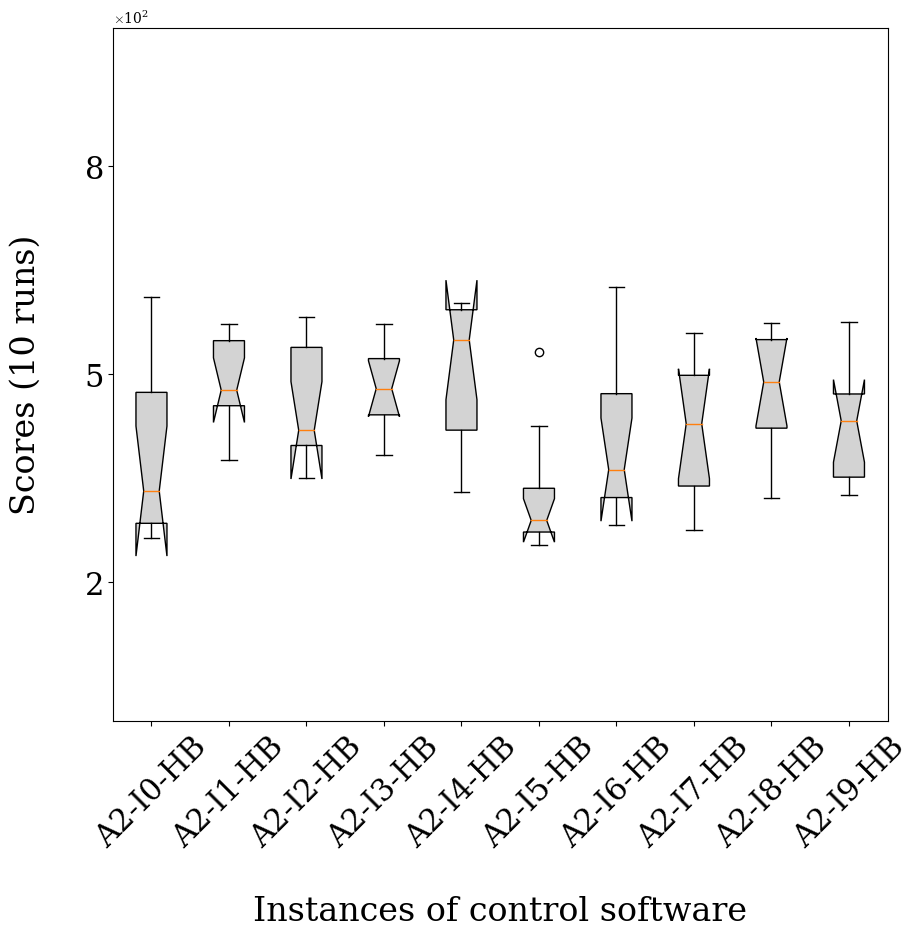

In [ ]:
mission_name = 'init-agg-100'

plt.figure(figsize=(10, 9)) 

plot_boxplots([values for values in score_dict[mission_name]], 'Tasking 100%', number_plots=len(score_dict[mission_name]), 
              plots_ticks=['A2-I0-HB', 'A2-I1-HB', 'A2-I2-HB', 'A2-I3-HB', 'A2-I4-HB', 'A2-I5-HB', 'A2-I6-HB', 'A2-I7-HB', 'A2-I8-HB', 'A2-I9-HB'],
              yticks=[200, 500, 800], ylim=[0, 1000])